In [1]:
import tensorflow as tf 
from tensorflow.linalg import eig 
import numpy as np
import time
import random as rd 
import matplotlib.pyplot as plt 

In [2]:
def measure_time(func):
    def decorated(param):
        x = time.time()
        func(param)
        dt = time.time()-x
        print(dt)
        return dt
    #
    return decorated
# 

In [3]:
x = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

In [4]:
xtf = tf.constant(x, dtype = tf.float64)

2022-03-02 07:09:16.889145: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-02 07:09:18.561003: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22302 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:18:00.0, compute capability: 8.6
2022-03-02 07:09:18.561616: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22302 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:3b:00.0, compute capability: 8.6
2022-03-02 07:09:18.562116: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0

In [5]:
eiglam, eigvec = eig(xtf)

In [6]:
eiglam

<tf.Tensor: shape=(3,), dtype=complex128, numpy=array([ 5.72978573e-17+0.j, -1.11684397e+00+0.j,  1.61168440e+01+0.j])>

In [7]:
eigvec

<tf.Tensor: shape=(3, 3), dtype=complex128, numpy=
array([[-0.40824829+0.j, -0.78583024+0.j,  0.23197069+0.j],
       [ 0.81649658+0.j, -0.08675134+0.j,  0.52532209+0.j],
       [-0.40824829+0.j,  0.61232756+0.j,  0.8186735 +0.j]])>

In [8]:
@measure_time
def numpy_diag(xx):
    np.linalg.eig(xx)
# 

@measure_time
def tf_diag(xx):
    eig(xx)
# 

1.0352060794830322
1000
2.6418070793151855
2000
7.001067638397217
3000
14.900269031524658
4000
25.685444593429565
5000
51.30526304244995
6000
67.79494428634644
7000
93.13854217529297
8000
126.89005923271179
9000


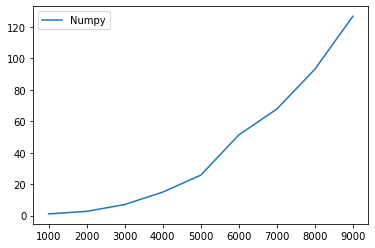

In [9]:
np_time = []
tf_time = []
xaxis = range(1000,10000,1000)
for i in xaxis:
    x = np.array([[rd.uniform(0.1,1000) for _ in range(i)] for __ in range(i)])
    #xtf = tf.constant(x, dtype=tf.float64)
    
    np_time.append(numpy_diag(x))
    #tf_time.append(tf_diag(xtf))
    print(i)
# 
plt.plot(xaxis, np_time, label="Numpy")
#plt.plot(xaxis, tf_time, label="TF")
plt.legend()
plt.show()